In [4]:
"""TO DO: CREATE A FUNCTION WITH PARAMETERS player1 AND player2 TO MAKE A REPRODUCIBLE REPORT"""

#Importing the required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

sns.set()

In [5]:
#Importing in the data and getting rid of the rank column.
#This is per 36 data for the 2022-2023 full season.
#This cell is currently not used, however, will be used in the future.
data = pd.read_csv('https://raw.githubusercontent.com/noah-po/Personal-Stuff/main/2022-2023%20basketball.csv',encoding='latin-1')
data = data.iloc[:,1:]

In [6]:
#Getting data that includes 2023-2024 games from two players.
#In the future, we would like to skip this step and load all games from one spreadsheet.
"""TO DO: GET SPREADSHEET FOR ALL PLAYERS IN THE 2023-2024 SEASON"""

#Currently, this only includes AD and Lebron data.
player_data_2023 = pd.read_csv('C:\\Users\\couch\\OneDrive\\Game_By_Game_2024.csv')

In [7]:
#Subsetting to include games where both players played.
overlap = player_data_2023[player_data_2023.duplicated('Date', keep=False) == True].sort_values("Date").reset_index()

In [8]:
#Getting basic data from the overlapped games. We add aditional columns below.
overlap = overlap.loc[:,['Player','PTS','TRB','AST','3P','FGA','FG','3PA','3P']]

In [9]:
#Creating the following columns: 
#points + rebounds, points + assists, rebounds + assists, points + rebounds + assists

overlap['PTS + RB'] = overlap["PTS"] + overlap['TRB']
overlap['PTS + AST'] = overlap["PTS"] + overlap['AST']
overlap['RB + AST'] = overlap["TRB"] + overlap['AST']
overlap['PTS + RB + AST'] = overlap["PTS"] + overlap['TRB'] + overlap["AST"]

In [10]:
#We separate the data into two groups - one for each player. 
"""TO DO: ADD FUNCTIONABILITY TO CHANGE PLAYERS"""


player1 = overlap[overlap['Player'] == 'LeBron James'].reset_index(drop = True).reset_index()
player2 = overlap[overlap['Player'] == 'Anthony Davis'].reset_index(drop = True).reset_index()

In [11]:
#Combining the two players into one dataframe. In the 
beef = pd.concat([player1,player2],axis = 1)

names = ["player1 " + i for i in beef.columns][0:14] + ["player2" + i for i in beef.columns][14:]
final = beef.set_axis(names, axis=1)

C:\Users\couch\AppData\Local\Temp\ipykernel_26644\4283335991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_players = final.corr()


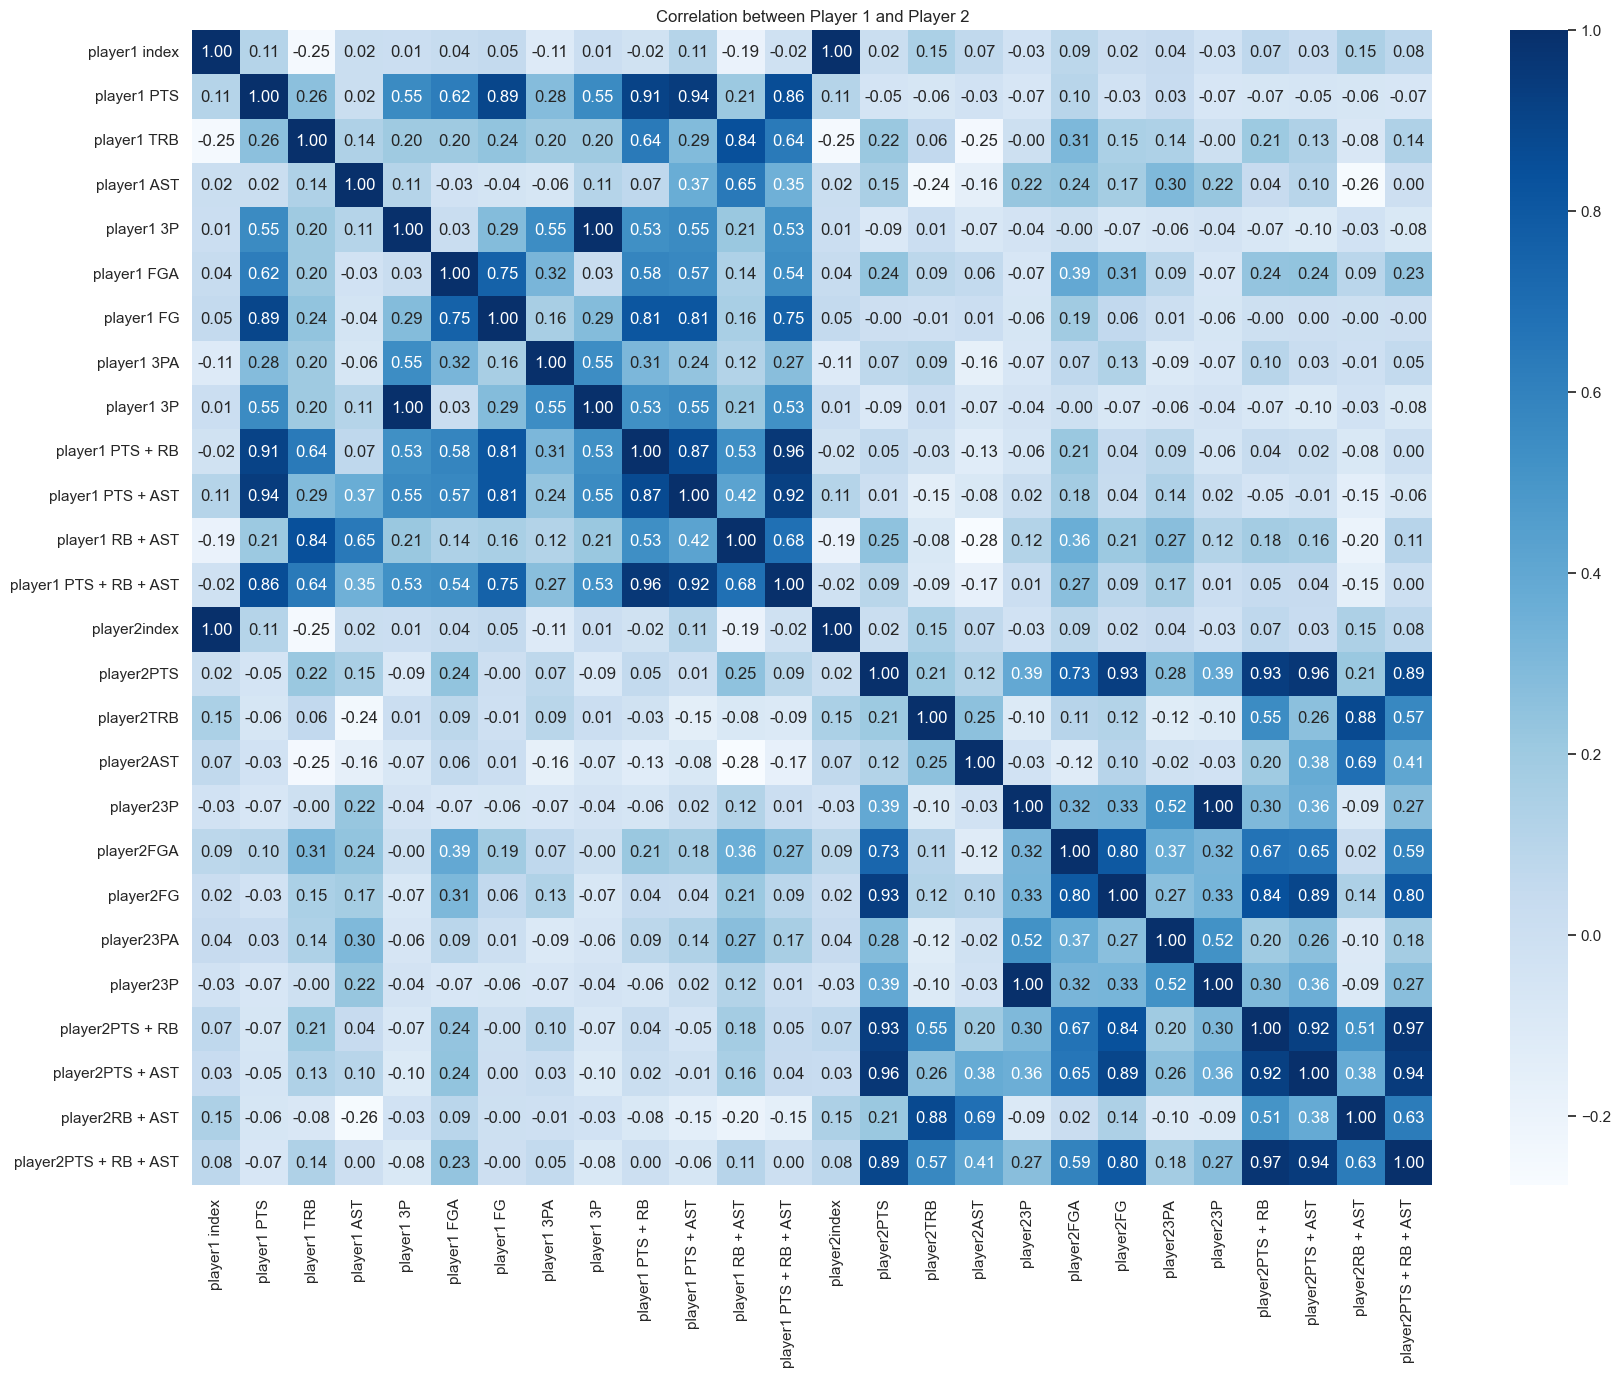

In [12]:
#This cell yields the final correlation visualization.
corr_players = final.corr()
corr_players.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_players,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlation between Player 1 and Player 2')
plt.show()